In [1]:
import os
import pandas as pd
import numpy as np
import math

# check if file exists
if not os.path.isfile("AuszugGV2QAktuell.xlsx"):
    print("File not found")
    raise Exception("File not found")
    # reading file
df = pd.read_excel('AuszugGV2QAktuell.xlsx', 1, header=7, skipfooter=12)
sliced = df.iloc[:, [7, 9, 13, 14, 15]]
sliced.columns = ['Gemeindename', 'Einwohner', 'Postleitzahl', 'Latitude', 'Longitude']
print(sliced.head())

             Gemeindename  Einwohner  Postleitzahl  Latitude  Longitude
0        Flensburg, Stadt        NaN           NaN       NaN        NaN
1        Flensburg, Stadt    90164.0       24937.0   9,43751   54,78252
2  Kiel, Landeshauptstadt        NaN           NaN       NaN        NaN
3  Kiel, Landeshauptstadt        NaN           NaN       NaN        NaN
4  Kiel, Landeshauptstadt   246794.0       24103.0  10,13727  54,321775


In [2]:
sliced['Einwohner'].astype(float)
cities = sliced[(pd.notna(sliced["Einwohner"])) & pd.notna(sliced["Latitude"])]
print(cities.head())
print(len(cities))
#cities.to_json("F:\Praxisphase\Localisation\data-parser-staedte\cities.json", orient='records')

              Gemeindename  Einwohner  Postleitzahl   Latitude  Longitude
1         Flensburg, Stadt    90164.0       24937.0    9,43751   54,78252
4   Kiel, Landeshauptstadt   246794.0       24103.0   10,13727  54,321775
7       Lübeck, Hansestadt   216530.0       23539.0  10,683932  53,866269
10       Neumünster, Stadt    80196.0       24534.0   9,988422  54,069895
13      Brunsbüttel, Stadt    12380.0       25541.0    9,13735  53,896932
10998


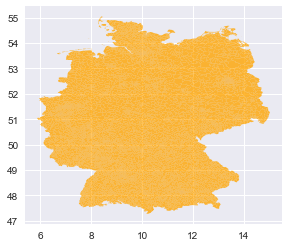

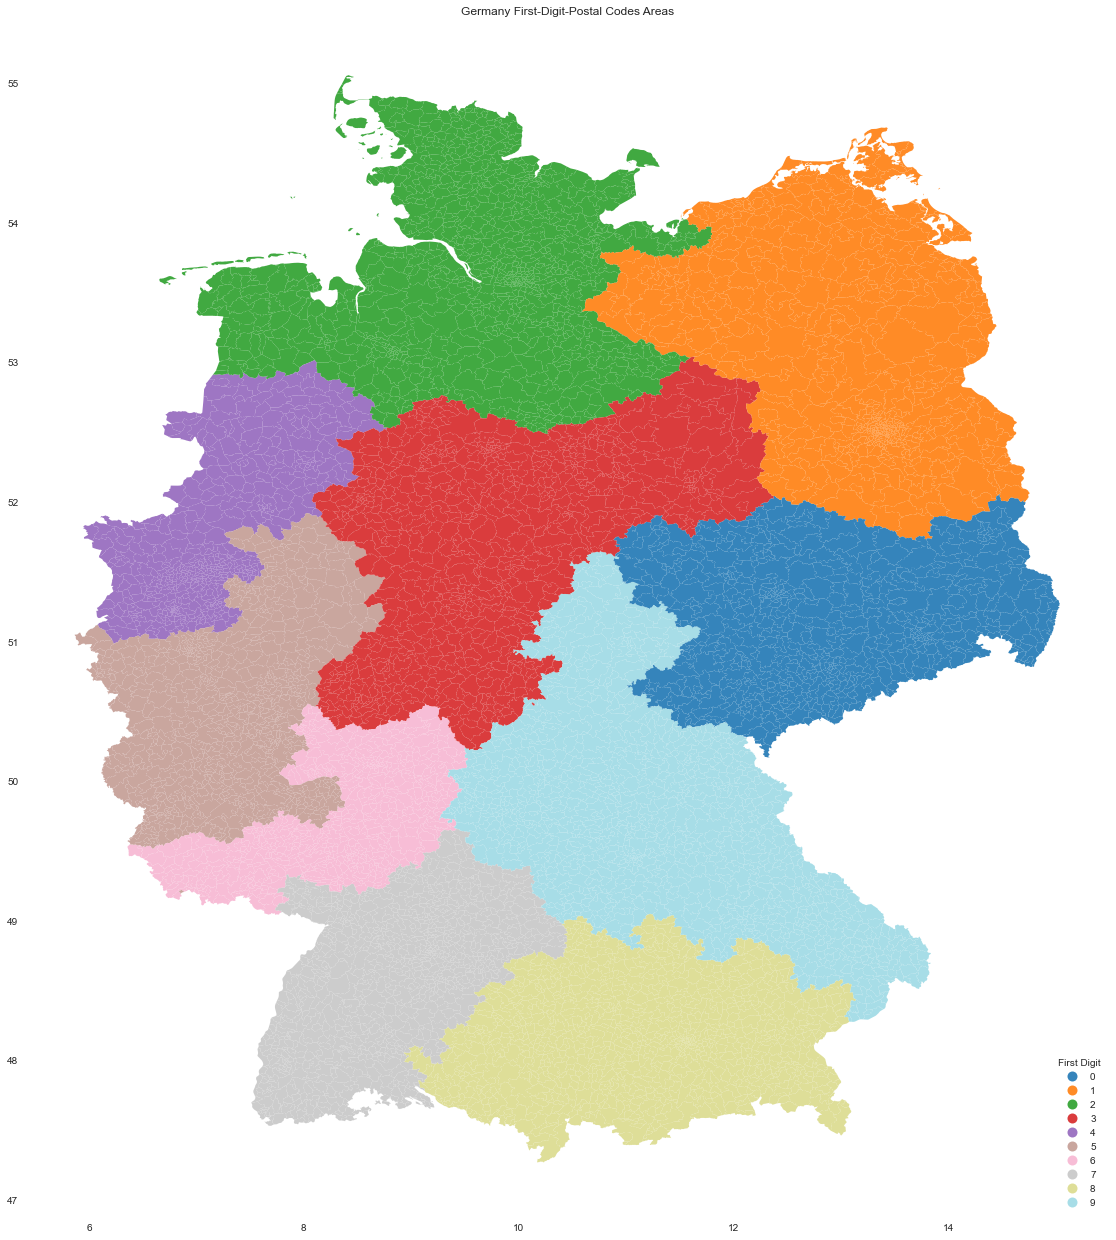

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline


plz_shape_df = gpd.read_file('F:\Praxisphase\Localisation\data-parser-staedte\data\plz-gebiete.shp', dtype={'plz': str})
plz_shape_df.head()
fig, ax = plt.subplots()
plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)
plt.rcParams['figure.figsize'] = [16 * 2, 2 * 11]

plz_shape_df = plz_shape_df.assign(first_dig_plz=lambda x: x['plz'].str.slice(start=0, stop=1))
fig, ax = plt.subplots()
plz_shape_df.plot(
    ax=ax,
    column='first_dig_plz',
    categorical=True,
    legend=True,
    legend_kwds={'title': 'First Digit', 'loc': 'lower right'},
    cmap='tab20',
    alpha=0.9
)

ax.set(
    title='Germany First-Digit-Postal Codes Areas',
    aspect=1.3,
    facecolor='white'
);